In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import numpy as np

#data files
nfl_stadiums_path = Path("../Data/nfl_stadiums.csv")
nfl_teams_path = Path("../Data/nfl_teams.csv")
spread_values_path = Path("../Data/spreadspoke_scores.csv")

# Read the stadiums, teams, and spread values
nfl_stadiums = pd.read_csv(nfl_stadiums_path, encoding='unicode_escape')
nfl_teams = pd.read_csv(nfl_teams_path, encoding='unicode_escape')
spread_values = pd.read_csv(spread_values_path, encoding='unicode_escape')

# Combine the data into a single DataFrame
team_stadium_merged = pd.merge(nfl_stadiums, nfl_teams,how ='left',on=["stadium_name"])

# Display the data table for preview
team_stadium_merged.head()

,stadium_name,stadium_location_x,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_zipcode,stadium_weather_type,stadium_capacity,stadium_surface,...,stadium_elevation,stadium_location_y,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,65500,Grass,...,367,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,...,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",NaN,indoor,65000,Grass,...,670,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",NaN,moderate,75024,Grass,...,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",NaN,warm,67814,Grass,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning Process - Miranda Melton

In [28]:
#collect column names within the dataframe 
team_stadium_merged.columns

Index(['stadium_name', 'stadium_location_x', 'stadium_open', 'stadium_close',
       'stadium_type', 'stadium_address', 'stadium_weather_station_zipcode',
       'stadium_weather_type', 'stadium_capacity', 'stadium_surface',
       'stadium_weather_station', 'stadium_weather_station_name',
       'stadium_latitude', 'stadium_longitude', 'stadium_azimuthangle',
       'stadium_elevation', 'stadium_location_y', 'team_name',
       'team_name_short', 'team_id', 'team_id_pfr', 'team_conference',
       'team_division', 'team_conference_pre2002', 'team_division_pre2002'],
      dtype='object')

In [29]:
#rename the columns so that they are easier to read
renamed_team_stadium_merged = team_stadium_merged.rename(columns ={"stadium_name":"Stadium Name", 
                                                                   "stadium_location_x":"Stadium Location",
                                                                   "stadium_open":"Year Opened", 
                                                                   "stadium_close":"Year Closed",
                                                                   "stadium_type": "Stadium Type", 
                                                                   "stadium_address": "Address", 
                                                                   "stadium_weather_station_zipcode":"Weather Station Zipcode",
                                                                   "stadium_weather_type": "Climate", 
                                                                   "stadium_capacity": "Stadium Capacity", 
                                                                   "stadium_surface": "Field Surface Type",
                                                                   "stadium_weather_station": "Weather Station",
                                                                   "stadium_weather_station_name": "Weather Station Name",
                                                                   "stadium_latitude": "Latitude", 
                                                                   "stadium_longitude": "Longitude", 
                                                                   "stadium_azimuthangle": "Dome Angle",
                                                                    "stadium_elevation": "Elevation (ft)", 
                                                                   "stadium_location_y":"Stadium Location2", 
                                                                   "team_name":"Team Name",
                                                                   "team_name_short":"Team Short Name", 
                                                                   "team_id":"Team ID", 
                                                                   "team_id_pfr": "Preferred ID", 
                                                                   "team_conference":"Conference (post 2002)",
                                                                "team_division": "Division (post 2002)", 
                                                                   "team_conference_pre2002": "Divison (pre 2002)", 
                                                                   "team_division_pre2002": "Divison (pre 2002)"})
renamed_team_stadium_merged.head()

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Weather Station Zipcode,Climate,Stadium Capacity,Field Surface Type,...,Elevation (ft),Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002)
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,65500,Grass,...,367,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,...,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",NaN,indoor,65000,Grass,...,670,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",NaN,moderate,75024,Grass,...,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",NaN,warm,67814,Grass,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Export the renamed, merged data into a csv
renamed_team_stadium_merged.to_csv("new_team_stadium_data.csv",index_label="Index")

# Read saved data
renamed_team_stadium_merged = pd.read_csv("new_team_stadium_data.csv", index_col="Index")

#Display sample of data
renamed_team_stadium_merged.head()

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Weather Station Zipcode,Climate,Stadium Capacity,Field Surface Type,...,Elevation (ft),Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002).1
Index,,,,,,,,,,,,,,,,,,,,,
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,65500,Grass,...,367,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,...,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",NaN,indoor,65000,Grass,...,670,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",NaN,moderate,75024,Grass,...,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",NaN,warm,67814,Grass,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Dropping columns that we do not need 
renamed_team_stadium_merged = renamed_team_stadium_merged.drop('Weather Station Zipcode', axis = 1)
renamed_team_stadium_merged = renamed_team_stadium_merged.drop('Weather Station', axis = 1)
renamed_team_stadium_merged = renamed_team_stadium_merged.drop('Weather Station Name', axis = 1)

In [32]:
#renamed_team_stadium_merged.head()

In [33]:
#Adjust the stadium capacity numbers so that they are the same format
renamed_team_stadium_merged['Stadium Capacity'] = renamed_team_stadium_merged['Stadium Capacity'].replace(',', '').astype(float)

In [34]:
#find duplicate rows
duplicate_rows = renamed_team_stadium_merged[renamed_team_stadium_merged.duplicated(subset=['Stadium Name','Latitude','Longitude'])]

In [35]:
#drop the duplicates
no_duplicates = renamed_team_stadium_merged.drop_duplicates()

In [36]:
#some more duplicates to clean up
renamed_team_stadium_merged.drop_duplicates(subset=['Stadium Name','Latitude','Longitude'], inplace=True)

In [37]:
#Drop specific rows
renamed_team_stadium_merged = renamed_team_stadium_merged.drop([126,127,128,129,130,131])
renamed_team_stadium_merged

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Climate,Stadium Capacity,Field Surface Type,Latitude,...,Elevation (ft),Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002).1
Index,,,,,,,,,,,,,,,,,,,,,
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",cold,65500.0,Grass,40.484600,...,367,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",indoor,72000.0,FieldTurf,29.416944,...,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",indoor,65000.0,Grass,36.090750,...,670,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",moderate,75024.0,Grass,48.218800,...,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",warm,67814.0,Grass,30.323889,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"Willow St. & Audubon Blvd., New Orleans, LA 70118",warm,86598.0,Grass,29.942600,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"200 Whitton Road, TW2 7BA, London, UK",moderate,75000.0,Grass,51.456111,...,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Wrigley Field,"Chicago, IL",1920.0,1970.0,indoor,"401 Chicago Ave, Minneapolis, MN 55415",indoor,66200.0,FieldTurf,44.973889,...,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Stadium and Team Summaries - Sheena Pickett

## Stadium Summary

In [38]:
#Calculate the total number of stadiums 

stadium_count = renamed_team_stadium_merged["Stadium Name"].nunique()
stadium_count

120

In [39]:
#Print the Names of all of the Stadiums
stadium_location = renamed_team_stadium_merged.set_index("Stadium Name")['Stadium Location']
stadium_location

Stadium Name
Acrisure Stadium          Pittsburgh, PA
Alamo Dome               San Antonio, TX
Allegiant Stadium           Paradise, NV
Allianz Arena            Munich, Germany
Alltel Stadium          Jacksonville, FL
                              ...       
War Memorial Stadium         Buffalo, NY
Wembley Stadium               London, UK
Wrigley Field                Chicago, IL
Yale Bowl                  New Haven, CT
Yankee Stadium                 Bronx, NY
Name: Stadium Location, Length: 120, dtype: object

In [40]:
#Print the Capacities of all of the Stadiums
stadium_capacity = renamed_team_stadium_merged.set_index("Stadium Name")['Stadium Capacity']
stadium_capacity

Stadium Name
Acrisure Stadium        65500.0
Alamo Dome              72000.0
Allegiant Stadium       65000.0
Allianz Arena           75024.0
Alltel Stadium          67814.0
                         ...   
War Memorial Stadium    86598.0
Wembley Stadium         75000.0
Wrigley Field           66200.0
Yale Bowl               63400.0
Yankee Stadium          40350.0
Name: Stadium Capacity, Length: 120, dtype: float64

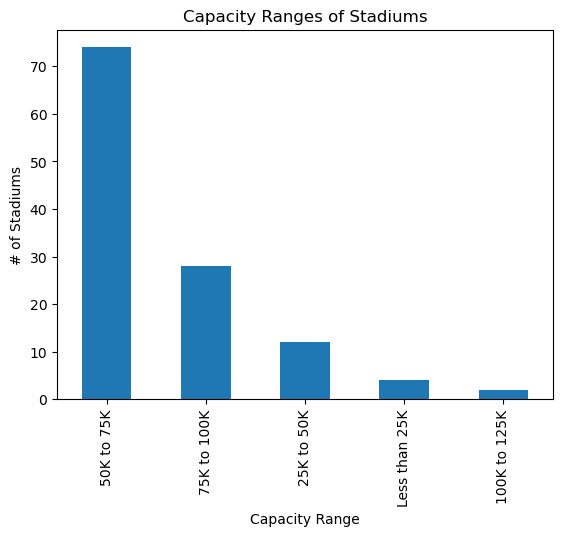

In [77]:
#stadiums by capacity count

#create the bins
bins = [0, 24999, 49999, 74999, 99999, 125000]

#create labels for the bins 
labels = ["Less than 25K", "25K to 50K", "50K to 75K", "75K to 100K", "100K to 125K"]

#slice the data and place it into the bins 
pd.cut(renamed_team_stadium_merged["Stadium Capacity"], bins, labels=labels)

# Place the data series into a new column inside of the DataFrame
renamed_team_stadium_merged["Stadium Capacity Range"] = pd.cut(renamed_team_stadium_merged["Stadium Capacity"], bins, labels=labels)

# Create a GroupBy object based upon "Stadium Capacity"
capacity_groups = renamed_team_stadium_merged.groupby("Stadium Capacity Range")

# Find how many rows fall into each bin
#print(capacity_groups["Stadium Capacity Range"].count())

#create a bar chart for showing the stadium capacity ranges
renamed_team_stadium_merged['Stadium Capacity Range'].value_counts().plot(kind='bar')
plt.xlabel('Capacity Range')
plt.ylabel('# of Stadiums')
plt.title("Capacity Ranges of Stadiums")

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Stadium Capacity Ranges.png")

plt.show()

In [42]:
#Print the Climate Type of all of the Stadiums
stadium_climate = renamed_team_stadium_merged.set_index("Stadium Name")['Climate']
stadium_climate

Stadium Name
Acrisure Stadium            cold
Alamo Dome                indoor
Allegiant Stadium         indoor
Allianz Arena           moderate
Alltel Stadium              warm
                          ...   
War Memorial Stadium        warm
Wembley Stadium         moderate
Wrigley Field             indoor
Yale Bowl                 indoor
Yankee Stadium          moderate
Name: Climate, Length: 120, dtype: object

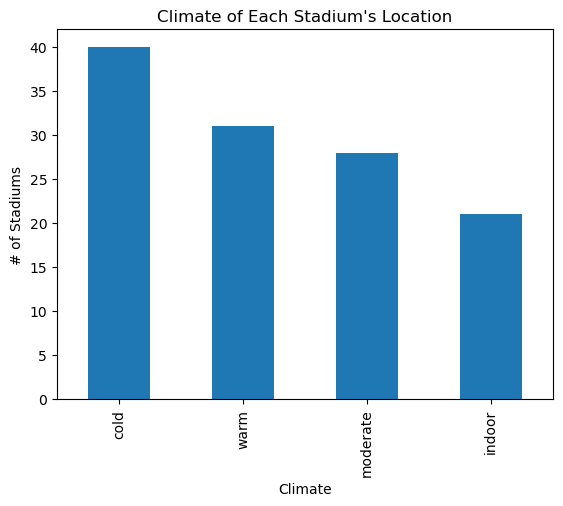

In [78]:
#create a bar chart for showing the stadium climate type
renamed_team_stadium_merged['Climate'].value_counts().plot(kind='bar')
plt.xlabel('Climate')
plt.ylabel('# of Stadiums')
plt.title("Climate of Each Stadium's Location")

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Stadiums v Climate.png")

plt.show()

In [44]:
#Print the Type of Grass that Each Stadium Uses
stadium_field = renamed_team_stadium_merged.set_index("Stadium Name")['Field Surface Type']
stadium_field

Stadium Name
Acrisure Stadium            Grass
Alamo Dome              FieldTurf
Allegiant Stadium           Grass
Allianz Arena               Grass
Alltel Stadium              Grass
                          ...    
War Memorial Stadium        Grass
Wembley Stadium             Grass
Wrigley Field           FieldTurf
Yale Bowl                   Grass
Yankee Stadium              Grass
Name: Field Surface Type, Length: 120, dtype: object

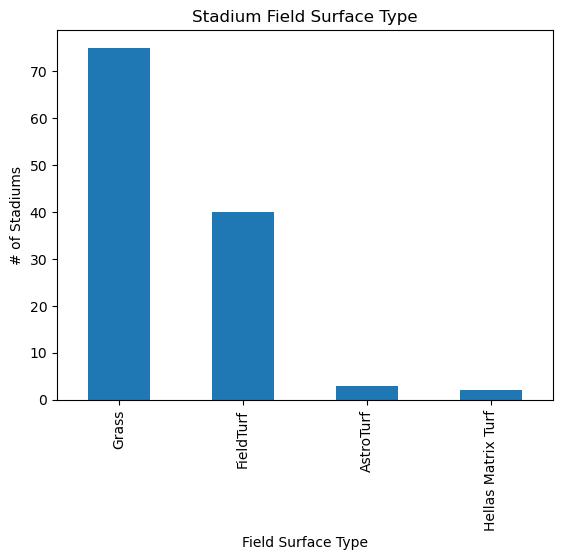

In [75]:
#create a bar chart for showing the stadium surface type
renamed_team_stadium_merged['Field Surface Type'].value_counts().plot(kind='bar')
plt.xlabel('Field Surface Type')
plt.ylabel('# of Stadiums')

plt.title("Stadium Field Surface Type")

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Stadiums v Field Surface Type.png")

plt.show()

In [46]:
#Print the Type of Stadium
stadium_type = renamed_team_stadium_merged.set_index("Stadium Name")['Stadium Type']
stadium_type

Stadium Name
Acrisure Stadium            outdoor
Alamo Dome                   indoor
Allegiant Stadium            indoor
Allianz Arena               outdoor
Alltel Stadium              outdoor
                           ...     
War Memorial Stadium        outdoor
Wembley Stadium             outdoor
Wrigley Field                indoor
Yale Bowl               retractable
Yankee Stadium              outdoor
Name: Stadium Type, Length: 120, dtype: object

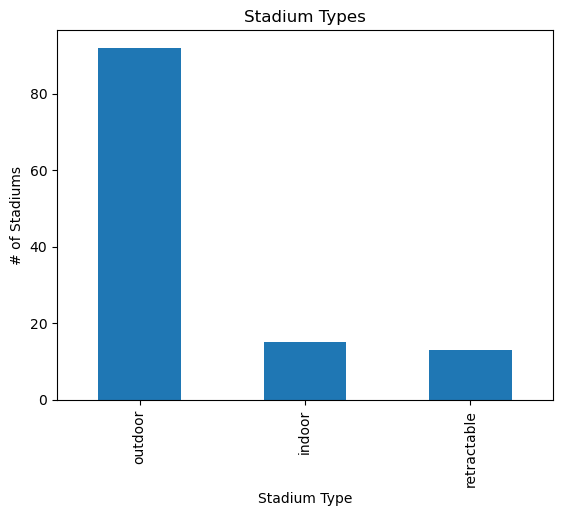

In [74]:
renamed_team_stadium_merged['Stadium Type'].value_counts().plot(kind='bar')
plt.xlabel('Stadium Type')
plt.ylabel('# of Stadiums')

plt.title("Stadium Types")

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Stadium Types.png")

plt.show()

In [48]:
#Print the Address for Each Stadium
stadium_address = renamed_team_stadium_merged.set_index("Stadium Name")['Address']
stadium_address

Stadium Name
Acrisure Stadium                 100 Art Rooney Ave, Pittsburgh, PA 15212
Alamo Dome                          100 Montana St, San Antonio, TX 78203
Allegiant Stadium                  3333 Al Davis Way, Las Vegas, NV 89118
Allianz Arena           Werner-Heisenberg-Allee 25, 80939 München, Ger...
Alltel Stadium                1 Everbank Field Dr, Jacksonville, FL 32202
                                              ...                        
War Memorial Stadium    Willow St. & Audubon Blvd., New Orleans, LA 70118
Wembley Stadium                     200 Whitton Road, TW2 7BA, London, UK
Wrigley Field                      401 Chicago Ave, Minneapolis, MN 55415
Yale Bowl                              1 Cardinals Dr, Glendale, AZ 85305
Yankee Stadium                                        Nashville, TN 37203
Name: Address, Length: 120, dtype: object

In [70]:
# Based on the calculations above, create a data frame 
stadium_summary = {"Location": stadium_location, 
                        "Address": stadium_address,
                       "Capacity": stadium_capacity,
                       "Stadium Type": stadium_type,
                       "Stadium Location Climate":stadium_climate,
                       "Stadium Field Type": stadium_field}

stadium_summary = pd.DataFrame(stadium_summary)

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Stadium Summary.png") 

stadium_summary


,Location,Address,Capacity,Stadium Type,Stadium Location Climate,Stadium Field Type
Stadium Name,,,,,,
Acrisure Stadium,"Pittsburgh, PA","100 Art Rooney Ave, Pittsburgh, PA 15212",65500.0,outdoor,cold,Grass
Alamo Dome,"San Antonio, TX","100 Montana St, San Antonio, TX 78203",72000.0,indoor,indoor,FieldTurf
Allegiant Stadium,"Paradise, NV","3333 Al Davis Way, Las Vegas, NV 89118",65000.0,indoor,indoor,Grass
Allianz Arena,"Munich, Germany","Werner-Heisenberg-Allee 25, 80939 München, Ger...",75024.0,outdoor,moderate,Grass
Alltel Stadium,"Jacksonville, FL","1 Everbank Field Dr, Jacksonville, FL 32202",67814.0,outdoor,warm,Grass
...,...,...,...,...,...,...
War Memorial Stadium,"Buffalo, NY","Willow St. & Audubon Blvd., New Orleans, LA 70118",86598.0,outdoor,warm,Grass
Wembley Stadium,"London, UK","200 Whitton Road, TW2 7BA, London, UK",75000.0,outdoor,moderate,Grass
Wrigley Field,"Chicago, IL","401 Chicago Ave, Minneapolis, MN 55415",66200.0,indoor,indoor,FieldTurf


<Figure size 640x480 with 0 Axes>

## Team Summary

In [50]:
#uploading a more detailed teams dataset
teams_data_path = Path("../Data/nfl_teams-Copy1.csv")

#read the csv and create a DataFrame
teams_data = pd.read_csv(teams_data_path, encoding='unicode_escape')

teams_data.head()

,stadium_name,stadium_location,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002,stadium_surface,stadium_weather_type,stadium_type,stadium_capacity
0,State Farm Stadium,"Glendale, AZ",Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West,Hellas Matrix Turf,warm,outdoor,70240
1,Mercedes-Benz Stadium,"Atlanta, GA",Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West,FieldTurf,moderate,indoor,31000
2,M&T Bank Stadium,"Baltimore, MD",Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central,Grass,moderate,outdoor,69143
3,Highmark Stadium,"Orchard Park, NY",Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East,Grass,warm,outdoor,65326
4,Bank of America Stadium,"Charlotte, NC",Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West,Grass,moderate,outdoor,73778


In [51]:
#rename the columns so that they are easier to read
teams_data = teams_data.rename(columns ={"stadium_name":"Stadium Name","stadium_location_x":"Stadium Location",
                                                                       "stadium_type": "Stadium Type",
                                                                    "stadium_weather_type": "Climate", 
                                                                       "stadium_capacity": "Stadium Capacity", 
                                                                       "stadium_surface": "Field Surface Type",
                                                                       "team_name":"Team Name",
                                                                       "team_name_short":"Team Short Name", 
                                                                       "team_id":"Team ID", 
                                                                       "team_id_pfr": "Preferred ID", 
                                                                       "team_conference":"Conference (post 2002)",
                                                                    "team_division": "Division (post 2002)", 
                                                                       "team_conference_pre2002": "Divison (pre 2002)", 
                                                                       "team_division_pre2002": "Divison (pre 2002)"})

teams_data.head()

,Stadium Name,stadium_location,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002),Field Surface Type,Climate,Stadium Type,Stadium Capacity
0,State Farm Stadium,"Glendale, AZ",Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West,Hellas Matrix Turf,warm,outdoor,70240
1,Mercedes-Benz Stadium,"Atlanta, GA",Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West,FieldTurf,moderate,indoor,31000
2,M&T Bank Stadium,"Baltimore, MD",Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central,Grass,moderate,outdoor,69143
3,Highmark Stadium,"Orchard Park, NY",Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East,Grass,warm,outdoor,65326
4,Bank of America Stadium,"Charlotte, NC",Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West,Grass,moderate,outdoor,73778


In [52]:
#Calculate the total number of teams in each conference

conference_count =teams_data["Conference (post 2002)"].value_counts()
conference_count

Conference (post 2002)
NFC    16
AFC    16
Name: count, dtype: int64

In [53]:
#Print the Teams of Each Conference
team_conference = teams_data.set_index("Team Name")['Conference (post 2002)']
team_conference

Team Name
Arizona Cardinals        NFC
Atlanta Falcons          NFC
Baltimore Ravens         AFC
Buffalo Bills            AFC
Carolina Panthers        NFC
Chicago Bears            NFC
Cincinnati Bengals       AFC
Cleveland Browns         AFC
Dallas Cowboys           NFC
Denver Broncos           AFC
Detroit Lions            NFC
Green Bay Packers        NFC
Houston Texans           AFC
Indianapolis Colts       AFC
Jacksonville Jaguars     AFC
Kansas City Chiefs       AFC
Las Vegas Raiders        AFC
Los Angeles Chargers     AFC
Los Angeles Rams         NFC
Miami Dolphins           AFC
Minnesota Vikings        NFC
New England Patriots     AFC
New Orleans Saints       NFC
New York Giants          NFC
New York Jets            AFC
Philadelphia Eagles      NFC
Pittsburgh Steelers      AFC
San Francisco 49ers      NFC
Seattle Seahawks         NFC
Tampa Bay Buccaneers     NFC
Tennessee Titans         AFC
Washington Commanders    NFC
Name: Conference (post 2002), dtype: object

In [54]:
#Calculate the total number of teams in each divison

division_count =teams_data["Division (post 2002)"].value_counts()
division_count

Division (post 2002)
NFC West     4
NFC South    4
AFC North    4
AFC East     4
NFC North    4
NFC East     4
AFC West     4
AFC South    4
Name: count, dtype: int64

In [55]:
#Print the Teams of Each Conference
team_division = teams_data.set_index("Team Name")['Division (post 2002)']
team_division

Team Name
Arizona Cardinals         NFC West
Atlanta Falcons          NFC South
Baltimore Ravens         AFC North
Buffalo Bills             AFC East
Carolina Panthers        NFC South
Chicago Bears            NFC North
Cincinnati Bengals       AFC North
Cleveland Browns         AFC North
Dallas Cowboys            NFC East
Denver Broncos            AFC West
Detroit Lions            NFC North
Green Bay Packers        NFC North
Houston Texans           AFC South
Indianapolis Colts       AFC South
Jacksonville Jaguars     AFC South
Kansas City Chiefs        AFC West
Las Vegas Raiders         AFC West
Los Angeles Chargers      AFC West
Los Angeles Rams          NFC West
Miami Dolphins            AFC East
Minnesota Vikings        NFC North
New England Patriots      AFC East
New Orleans Saints       NFC South
New York Giants           NFC East
New York Jets             AFC East
Philadelphia Eagles       NFC East
Pittsburgh Steelers      AFC North
San Francisco 49ers       NFC West
Seattle Se

In [56]:
#print the stadium name for each team

home_stadium = teams_data.set_index("Team Name")['Stadium Name']
home_stadium

Team Name
Arizona Cardinals                     State Farm Stadium
Atlanta Falcons                    Mercedes-Benz Stadium
Baltimore Ravens                        M&T Bank Stadium
Buffalo Bills                           Highmark Stadium
Carolina Panthers                Bank of America Stadium
Chicago Bears                              Soldier Field
Cincinnati Bengals                    Paul Brown Stadium
Cleveland Browns                     FirstEnergy Stadium
Dallas Cowboys                              AT&T Stadium
Denver Broncos                Empower Field at Mile High
Detroit Lions                                 Ford Field
Green Bay Packers                          Lambeau Field
Houston Texans                               NRG Stadium
Indianapolis Colts                     Lucas Oil Stadium
Jacksonville Jaguars                     TIAA Bank Field
Kansas City Chiefs       GEHA Field at Arrowhead Stadium
Las Vegas Raiders                      Allegiant Stadium
Los Angeles Chargers 

In [57]:
#print the climate for each team

team_climate = teams_data.set_index("Team Name")['Climate']
team_climate

Team Name
Arizona Cardinals            warm
Atlanta Falcons          moderate
Baltimore Ravens         moderate
Buffalo Bills                warm
Carolina Panthers        moderate
Chicago Bears            moderate
Cincinnati Bengals       moderate
Cleveland Browns         moderate
Dallas Cowboys             indoor
Denver Broncos               cold
Detroit Lions                cold
Green Bay Packers            warm
Houston Texans               cold
Indianapolis Colts           warm
Jacksonville Jaguars         warm
Kansas City Chiefs       moderate
Las Vegas Raiders          indoor
Los Angeles Chargers       indoor
Los Angeles Rams           indoor
Miami Dolphins               cold
Minnesota Vikings            cold
New England Patriots         warm
New Orleans Saints         indoor
New York Giants          moderate
New York Jets            moderate
Philadelphia Eagles          warm
Pittsburgh Steelers          cold
San Francisco 49ers          warm
Seattle Seahawks           indoor
Tamp

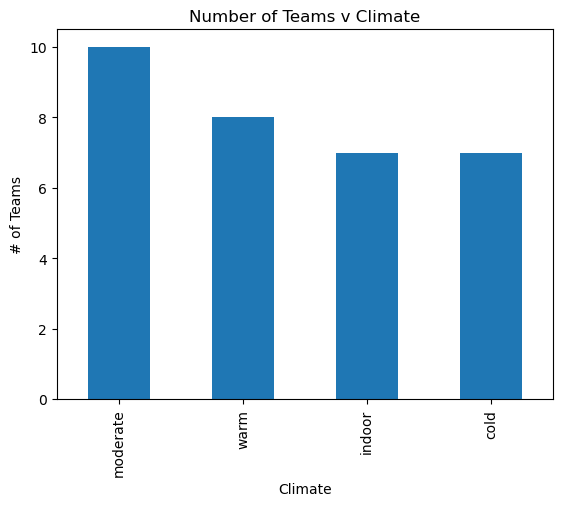

In [73]:
#create a bar chart for showing each team in different climates
teams_data['Climate'].value_counts().plot(kind='bar')
plt.xlabel('Climate')
plt.ylabel('# of Teams')

plt.title("Number of Teams v Climate")

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Teams v Climate.png")

plt.show()

In [59]:
#print the field type for each team

team_field = teams_data.set_index("Team Name")['Field Surface Type']
team_field

Team Name
Arizona Cardinals        Hellas Matrix Turf
Atlanta Falcons                   FieldTurf
Baltimore Ravens                      Grass
Buffalo Bills                         Grass
Carolina Panthers                     Grass
Chicago Bears                         Grass
Cincinnati Bengals                    Grass
Cleveland Browns                      Grass
Dallas Cowboys                    FieldTurf
Denver Broncos                        Grass
Detroit Lions                         Grass
Green Bay Packers                     Grass
Houston Texans                        Grass
Indianapolis Colts                    Grass
Jacksonville Jaguars                  Grass
Kansas City Chiefs                    Grass
Las Vegas Raiders                     Grass
Los Angeles Chargers              AstroTurf
Los Angeles Rams                  AstroTurf
Miami Dolphins                    FieldTurf
Minnesota Vikings                     Grass
New England Patriots              FieldTurf
New Orleans Saints    

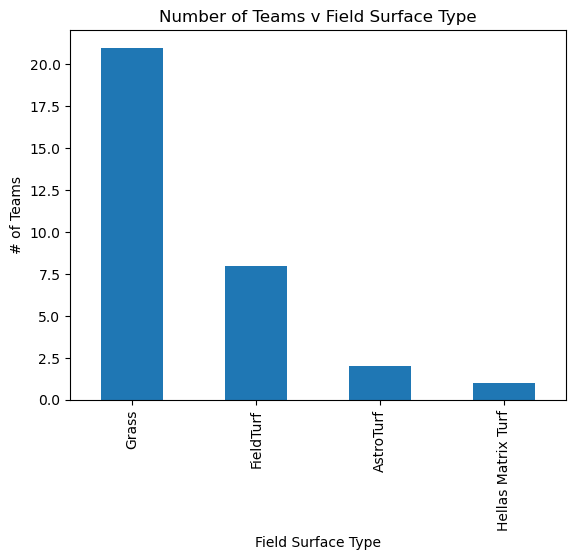

In [72]:
#create a bar chart for showing each team in different climates
teams_data['Field Surface Type'].value_counts().plot(kind='bar')
plt.xlabel('Field Surface Type')
plt.ylabel('# of Teams')
plt.title("Number of Teams v Field Surface Type")

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Teams v Field Surface Type.png")

plt.show()

In [61]:
#print the stadium type for each team

team_stadium_type = teams_data.set_index("Team Name")['Stadium Type']
team_stadium_type

Team Name
Arizona Cardinals            outdoor
Atlanta Falcons               indoor
Baltimore Ravens             outdoor
Buffalo Bills                outdoor
Carolina Panthers            outdoor
Chicago Bears                outdoor
Cincinnati Bengals       retractable
Cleveland Browns             outdoor
Dallas Cowboys               outdoor
Denver Broncos               outdoor
Detroit Lions                outdoor
Green Bay Packers            outdoor
Houston Texans               outdoor
Indianapolis Colts           outdoor
Jacksonville Jaguars         outdoor
Kansas City Chiefs           outdoor
Las Vegas Raiders            outdoor
Los Angeles Chargers     retractable
Los Angeles Rams             outdoor
Miami Dolphins                indoor
Minnesota Vikings            outdoor
New England Patriots         outdoor
New Orleans Saints           outdoor
New York Giants              outdoor
New York Jets                outdoor
Philadelphia Eagles          outdoor
Pittsburgh Steelers         

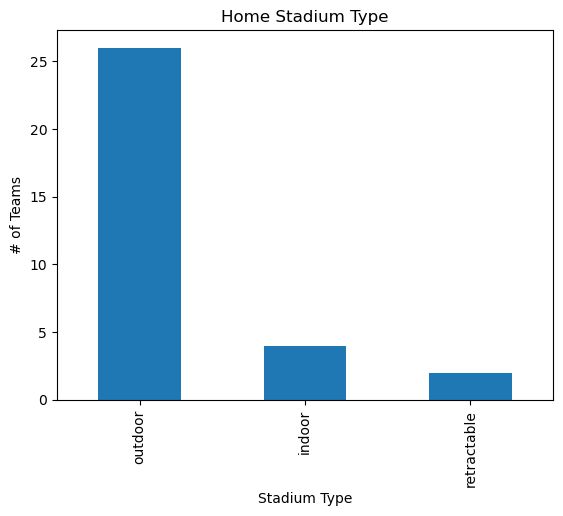

In [79]:
#create a bar chart for showing each team in different climates
teams_data['Stadium Type'].value_counts().plot(kind='bar')
plt.xlabel('Stadium Type')
plt.ylabel('# of Teams')
plt.title("Home Stadium Type")

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Teams v Stadium Type.png")
plt.show()

In [80]:
# Based on the calculations above, create a data frame 
team_summary = {"Conference": team_conference, 
                        "Division": team_division,
                        "Home Field": home_stadium,
                       "Home Field Climate": team_climate,
                       "Home Field Type": team_field,
                       "Home Stadium Type": team_stadium_type}

team_summary = pd.DataFrame(team_summary)

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Team Summary.png")


team_summary.head()

,Conference,Division,Home Field,Home Field Climate,Home Field Type,Home Stadium Type
Team Name,,,,,,
Arizona Cardinals,NFC,NFC West,State Farm Stadium,warm,Hellas Matrix Turf,outdoor
Atlanta Falcons,NFC,NFC South,Mercedes-Benz Stadium,moderate,FieldTurf,indoor
Baltimore Ravens,AFC,AFC North,M&T Bank Stadium,moderate,Grass,outdoor
Buffalo Bills,AFC,AFC East,Highmark Stadium,warm,Grass,outdoor
Carolina Panthers,NFC,NFC South,Bank of America Stadium,moderate,Grass,outdoor


<Figure size 640x480 with 0 Axes>

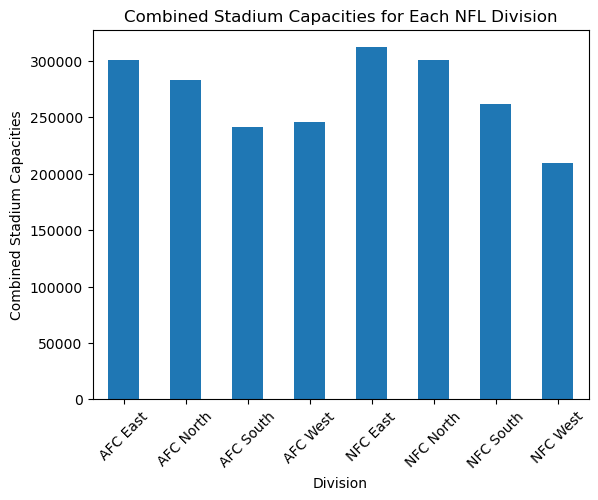

In [81]:
#which division has the largest combined stadium capacity?

#separate the divisions and the capacities into a new DataFrame
division_capacity = teams_data[['Division (post 2002)', 'Stadium Capacity']]

# Group the data by product category
grouped_data = division_capacity.groupby('Division (post 2002)')

# Calculate the total sales for each category
total_capacity = grouped_data['Stadium Capacity'].sum()

#create a bar chart for showing combined stadium capacities by division
total_capacity.plot(kind='bar', rot=45)
plt.xlabel('Division')
plt.ylabel('Combined Stadium Capacities')

plt.title("Combined Stadium Capacities for Each NFL Division")

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Division_Combined_Capacity.png")

plt.show()

# Betting Analysis - Owen Pollard

In [65]:
# Print the column names
print(spread_values.columns)

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail'],
      dtype='object')


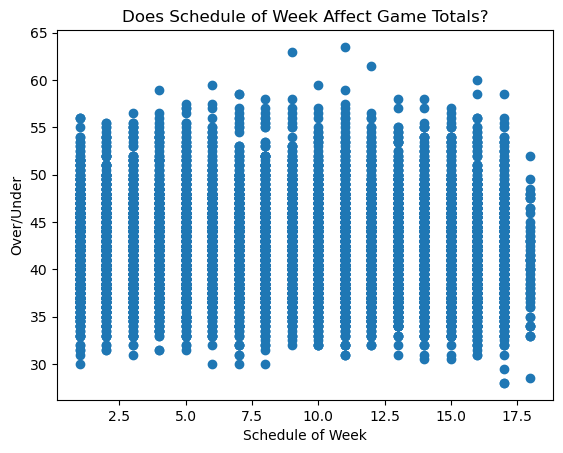

In [82]:
# Convert the columns to numeric data types
spread_values['schedule_week'] = pd.to_numeric(spread_values['schedule_week'], errors='coerce')
spread_values['over_under_line'] = pd.to_numeric(spread_values['over_under_line'], errors='coerce')

# Create a scatter plot
plt.scatter(spread_values['schedule_week'], spread_values['over_under_line'])

# Add labels and title
plt.xlabel('Schedule of Week')
plt.ylabel('Over/Under')
plt.title('Does Schedule of Week Affect Game Totals?')

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Schedule v Totals.png")

# Display the plot
plt.show()

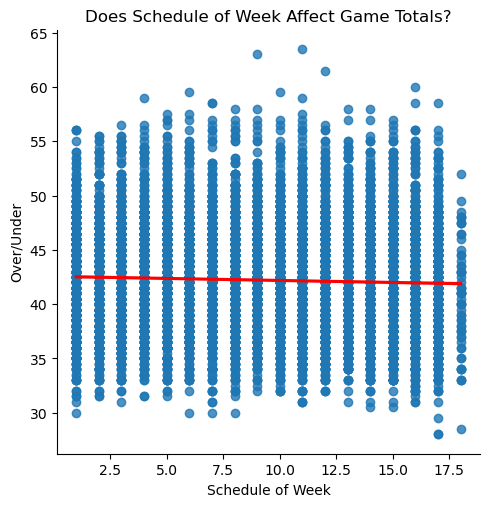

In [83]:
# Convert the columns to numeric data types
spread_values['schedule_week'] = pd.to_numeric(spread_values['schedule_week'], errors='coerce')
spread_values['over_under_line'] = pd.to_numeric(spread_values['over_under_line'], errors='coerce')

# Create a linear regression chart
sns.lmplot(x='schedule_week', y='over_under_line', data=spread_values, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Schedule of Week')
plt.ylabel('Over/Under')
plt.title('Does Schedule of Week Affect Game Totals?')

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Schedule v Totals - Regression.png")

# Display the plot
plt.show()

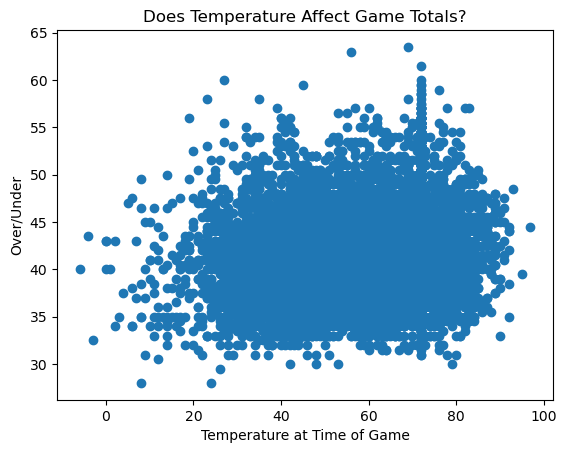

In [84]:
# Convert the columns to numeric data types
spread_values['weather_temperature'] = pd.to_numeric(spread_values['weather_temperature'], errors='coerce')
spread_values['over_under_line'] = pd.to_numeric(spread_values['over_under_line'], errors='coerce')

# Create a scatter plot
plt.scatter(spread_values['weather_temperature'], spread_values['over_under_line'])

# Add labels and title
plt.xlabel('Temperature at Time of Game')
plt.ylabel('Over/Under')
plt.title('Does Temperature Affect Game Totals?')

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Schedule v Temperature.png")

# Display the plot
plt.show()

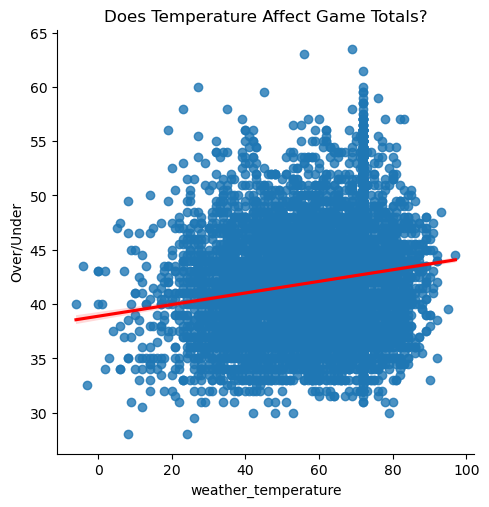

In [85]:
# Convert the columns to numeric data types
spread_values['weather_temperature'] = pd.to_numeric(spread_values['weather_temperature'], errors='coerce')
spread_values['over_under_line'] = pd.to_numeric(spread_values['over_under_line'], errors='coerce')

# Create a linear regression chart
sns.lmplot(x='weather_temperature', y='over_under_line', data=spread_values, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('weather_temperature')
plt.ylabel('Over/Under')
plt.title('Does Temperature Affect Game Totals?')

#save the figure in the OutPut Data Folder 
plt.savefig("../Output Data/Schedule v Temperature - Regression.png")

# Display the plot
plt.show()